In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
from PIL import Image
mpl.rcParams['figure.dpi'] = 200

In [2]:
!wget "https://courses.openedu.ru/assets/courseware/v1/45fec0203681ef61454a59f61f1eef1a/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/car-2596344_1280.jpg"

--2023-09-23 19:20:09--  https://courses.openedu.ru/assets/courseware/v1/45fec0203681ef61454a59f61f1eef1a/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/car-2596344_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220069 (215K) [image/jpeg]
Saving to: ‘car-2596344_1280.jpg’

car-2596344_1280.jp 100%[===================>] 214.91K   481KB/s    in 0.4s    

2023-09-23 19:20:11 (481 KB/s) - ‘car-2596344_1280.jpg’ saved [220069/220069]



In [32]:
img_name = "car-2596344_1280.jpg"

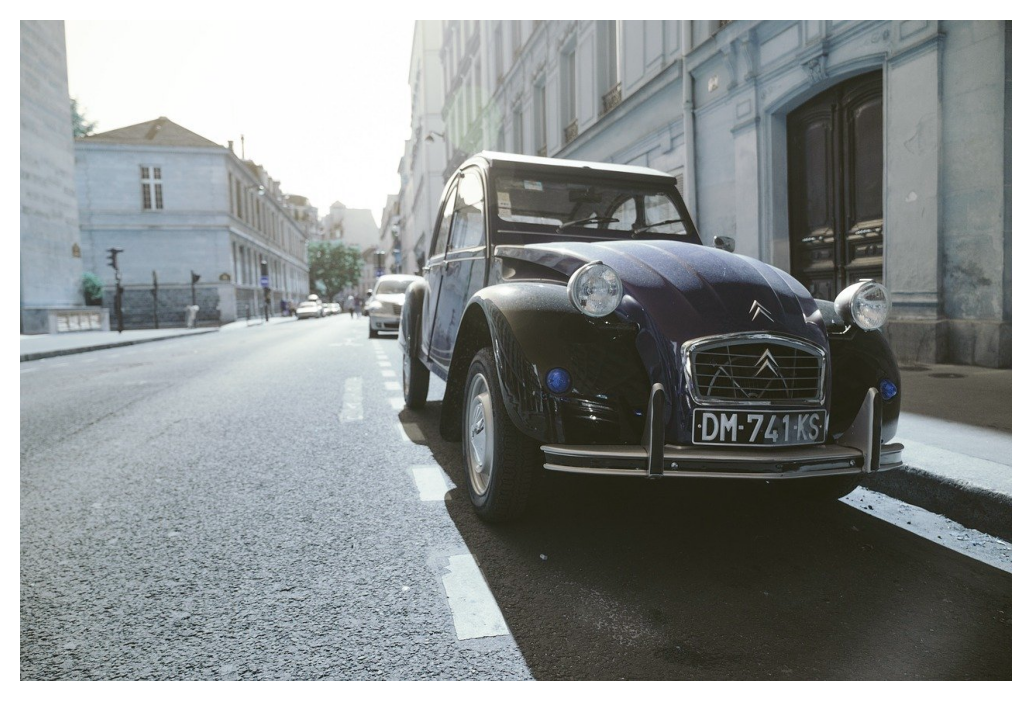

In [33]:
img = cv2.imread(img_name)
plt.axis("off")
plt.imshow(img);

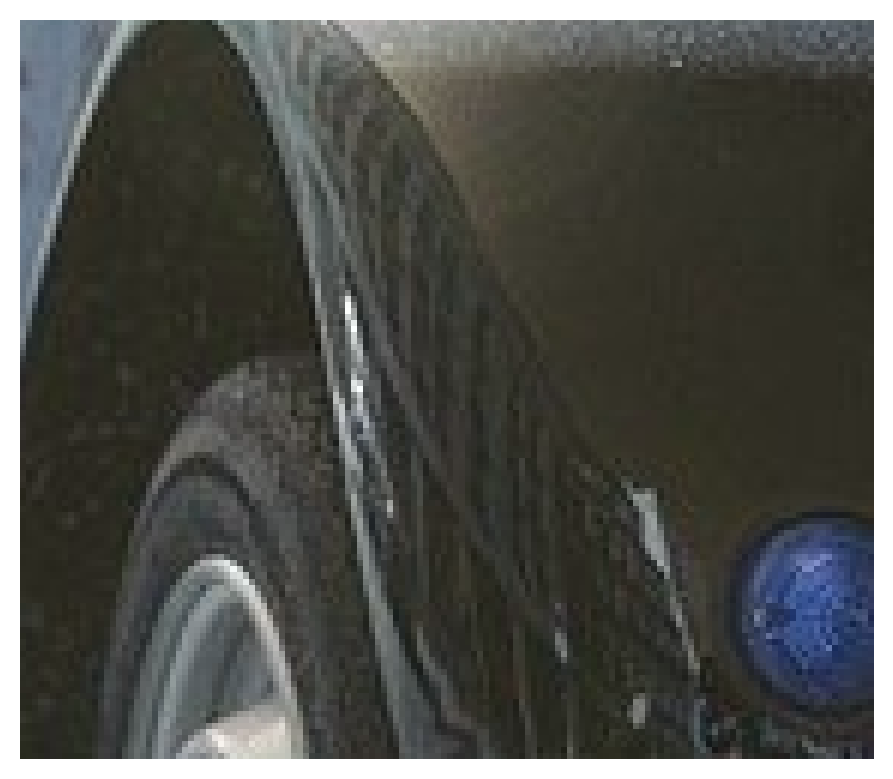

In [34]:
cropped_img = img[367:490, 560:702]
plt.axis("off")
plt.imshow(cropped_img);

In [35]:
cropped_img.shape

(123, 142, 3)

In [36]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cropped_img_gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

In [37]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img_gray, None)
kp2, des2 = sift.detectAndCompute(cropped_img_gray, None)

In [38]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(des1, des2)

In [39]:
matches = sorted(matches, key=lambda x:x.distance)

img_idx = matches[0].queryIdx
cropped_img_idx = matches[0].trainIdx

(x1, y1) = kp1[img_idx].pt
(x2, y2) = kp2[cropped_img_idx].pt

print(x1, y1)
print(x2, y2)

582.3096313476562 438.72113037109375
22.309606552124023 71.72114562988281


In [46]:
B, G, R = img[int(np.round(y1))][int(np.round(x1))]

In [47]:
B, G, R

(43, 40, 35)